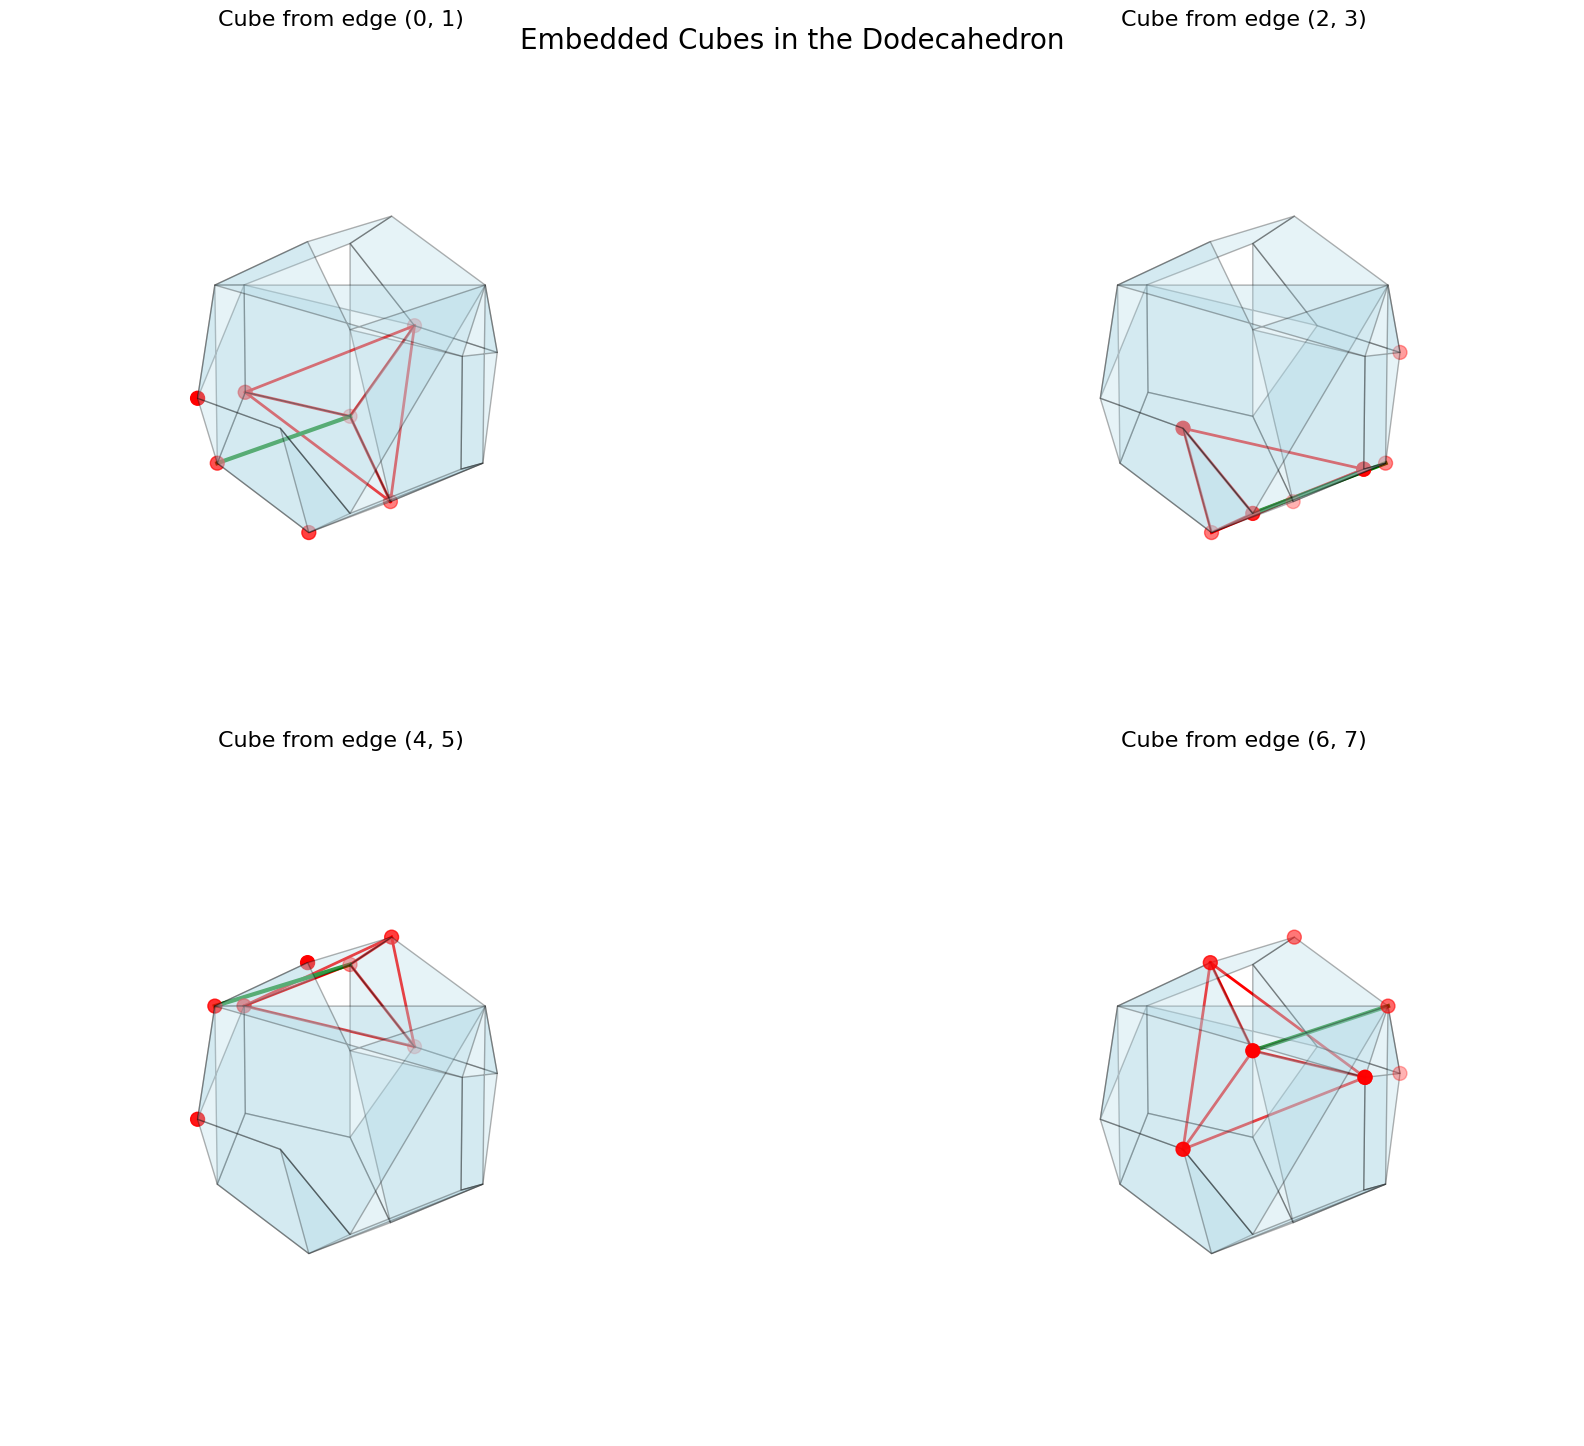


Key insights about the embedded cubes:
• Each edge of the dodecahedron determines a unique cube
• There are 5 such cubes in total (each obtained in 6 different ways)
• The symmetry group of the dodecahedron permutes these 5 cubes
• This gives us a homomorphism from the symmetry group to S₅
• The homomorphism is injective and its image is A₅


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

def generate_dodecahedron():
    phi = (1 + np.sqrt(5)) / 2  # Golden ratio
    vertices = np.array([
        # Base vertices
        [-1, -1, -1], [1, -1, -1], [1, 1, -1], [-1, 1, -1],
        [-1, -1, 1], [1, -1, 1], [1, 1, 1], [-1, 1, 1],
        # Additional vertices
        [0, -phi, -1/phi], [0, phi, -1/phi], [-1/phi, 0, -phi], [1/phi, 0, -phi],
        [0, -phi, 1/phi], [0, phi, 1/phi], [-1/phi, 0, phi], [1/phi, 0, phi],
        [-phi, -1/phi, 0], [-phi, 1/phi, 0], [phi, -1/phi, 0], [phi, 1/phi, 0]
    ]) / np.sqrt(3)  # Normalize size
    
    # Define pentagon faces
    faces = [
        [0, 8, 1, 11, 10], [0, 16, 17, 3, 10], [0, 8, 12, 16, 4],
        [1, 8, 12, 18, 5], [1, 18, 19, 2, 11], [2, 9, 3, 11, 19],
        [2, 19, 18, 5, 7], [3, 9, 13, 17, 7], [4, 14, 15, 5, 12],
        [4, 16, 17, 7, 14], [5, 15, 6, 7, 13], [6, 13, 9, 3, 10]
    ]
    
    return vertices, faces

def find_embedded_cube(vertices, edge_start, edge_end):
    """Find the vertices of the embedded cube given an edge."""
    # Find the vertices connected to edge_start (excluding edge_end)
    connected_to_start = []
    for i in range(len(vertices)):
        if i != edge_end and np.linalg.norm(vertices[i] - vertices[edge_start]) < 1.1:
            connected_to_start.append(i)
    
    # Find the vertices connected to edge_end (excluding edge_start)
    connected_to_end = []
    for i in range(len(vertices)):
        if i != edge_start and np.linalg.norm(vertices[i] - vertices[edge_end]) < 1.1:
            connected_to_end.append(i)
    
    # The four endpoints form a square of the cube
    cube_vertices = [vertices[i] for i in connected_to_start + connected_to_end]
    return np.array(cube_vertices)

def plot_dodecahedron_with_cube(ax, vertices, faces, cube_edge=(0, 1)):
    # Plot dodecahedron
    polys = [[vertices[i] for i in face] for face in faces]
    poly3d = Poly3DCollection(polys, alpha=0.3)
    poly3d.set_facecolor('lightblue')
    poly3d.set_edgecolor('black')
    ax.add_collection3d(poly3d)
    
    # Plot the embedded cube
    start, end = cube_edge
    cube_vertices = find_embedded_cube(vertices, start, end)
    
    # Plot cube vertices
    ax.scatter(cube_vertices[:, 0], cube_vertices[:, 1], cube_vertices[:, 2], 
              color='red', s=100)
    
    # Plot cube edges
    for i in range(4):
        for j in range(i+1, 4):
            ax.plot3D([cube_vertices[i,0], cube_vertices[j,0]],
                     [cube_vertices[i,1], cube_vertices[j,1]],
                     [cube_vertices[i,2], cube_vertices[j,2]],
                     'r-', linewidth=2)
    
    # Highlight the original edge
    ax.plot3D([vertices[start,0], vertices[end,0]],
              [vertices[start,1], vertices[end,1]],
              [vertices[start,2], vertices[end,2]],
              'g-', linewidth=3)
    
    # Set viewing angle and limits
    ax.view_init(elev=20, azim=45)
    limit = 1.2
    ax.set_xlim(-limit, limit)
    ax.set_ylim(-limit, limit)
    ax.set_zlim(-limit, limit)
    ax.set_box_aspect([1,1,1])
    ax.axis('off')

def visualize_embedded_cubes():
    vertices, faces = generate_dodecahedron()
    
    fig = plt.figure(figsize=(20, 15))
    plt.suptitle("Embedded Cubes in the Dodecahedron", fontsize=20, y=0.95)
    
    # Show different embedded cubes from different edges
    edges = [(0, 1), (2, 3), (4, 5), (6, 7)]
    for i, edge in enumerate(edges, 1):
        ax = fig.add_subplot(2, 2, i, projection='3d')
        plot_dodecahedron_with_cube(ax, vertices, faces, edge)
        ax.set_title(f"Cube from edge {edge}", pad=20, fontsize=16)
    
    plt.tight_layout()
    plt.show()
    
    print("\nKey insights about the embedded cubes:")
    print("• Each edge of the dodecahedron determines a unique cube")
    print("• There are 5 such cubes in total (each obtained in 6 different ways)")
    print("• The symmetry group of the dodecahedron permutes these 5 cubes")
    print("• This gives us a homomorphism from the symmetry group to S₅")
    print("• The homomorphism is injective and its image is A₅")

if __name__ == "__main__":
    visualize_embedded_cubes()

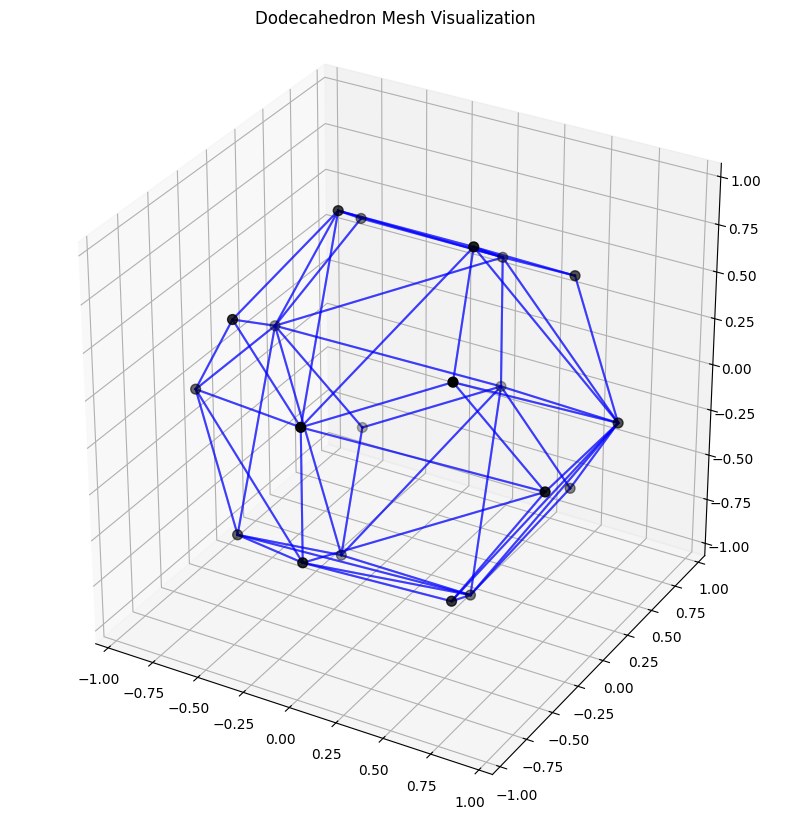

In [17]:
import math
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
import meshio

def generate_dodecahedron(radius, center):
    """ Generate a regular `dodecahedron`_.

    Args:
        radius (``float``): Radius of the shape.
        center (``numpy.ndarray``): shape center.

    Returns:
        The dodecahedron :py:class:`Mesh` object.

    .. _dodecahedron: http://mathworld.wolfram.com/Dodecahedron.html
    """

    #r = (1.0 + math.sqrt(5.0)) / 2.0
    vertices = np.array([
        -0.57735,  -0.57735,  0.57735,
        0.934172,  0.356822,  0,
        0.934172,  -0.356822,  0,
        -0.934172,  0.356822,  0,
        -0.934172,  -0.356822,  0,
        0,  0.934172,  0.356822,
        0,  0.934172,  -0.356822,
        0.356822,  0,  -0.934172,
        -0.356822,  0,  -0.934172,
        0,  -0.934172,  -0.356822,
        0,  -0.934172,  0.356822,
        0.356822,  0,  0.934172,
        -0.356822,  0,  0.934172,
        0.57735,  0.57735,  -0.57735,
        0.57735,  0.57735,  0.57735,
        -0.57735,  0.57735,  -0.57735,
        -0.57735,  0.57735,  0.57735,
        0.57735,  -0.57735,  -0.57735,
        0.57735,  -0.57735,  0.57735,
        -0.57735,  -0.57735,  -0.57735,
        ]).reshape((-1,3), order="C")
    faces = np.array([
        19, 3, 2,
        12, 19, 2,
        15, 12, 2,
        8, 14, 2,
        18, 8, 2,
        3, 18, 2,
        20, 5, 4,
        9, 20, 4,
        16, 9, 4,
        13, 17, 4,
        1, 13, 4,
        5, 1, 4,
        7, 16, 4,
        6, 7, 4,
        17, 6, 4,
        6, 15, 2,
        7, 6, 2,
        14, 7, 2,
        10, 18, 3,
        11, 10, 3,
        19, 11, 3,
        11, 1, 5,
        10, 11, 5,
        20, 10, 5,
        20, 9, 8,
        10, 20, 8,
        18, 10, 8,
        9, 16, 7,
        8, 9, 7,
        14, 8, 7,
        12, 15, 6,
        13, 12, 6,
        17, 13, 6,
        13, 1, 11,
        12, 13, 11,
        19, 12, 11,
        ]).reshape((-1, 3), order="C")-1

    mesh = meshio.Mesh(vertices, {"triangle": faces})

    length = norm(mesh.points, axis=1).reshape((-1, 1))
    vertices = mesh.points / length * radius + center

    return meshio.Mesh(points=vertices, cells=[("triangle", faces)])

# Add this visualization function
def visualize_mesh(mesh):
    fig = plt.figure(figsize=(10, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Plot vertices
    ax.scatter(mesh.points[:, 0], mesh.points[:, 1], mesh.points[:, 2], 
              color='black', s=50)
    
    # Plot faces
    triangles = mesh.get_cells_type("triangle")
    for triangle in triangles:
        vertices = mesh.points[triangle]
        x = vertices[:, 0]
        y = vertices[:, 1]
        z = vertices[:, 2]
        # Plot each edge of the triangle
        for i in range(3):
            ax.plot([x[i], x[(i+1)%3]], 
                   [y[i], y[(i+1)%3]], 
                   [z[i], z[(i+1)%3]], 
                   'b-', alpha=0.5)
    
    # Set equal aspect ratio
    ax.set_box_aspect([1,1,1])
    ax.set_title('Dodecahedron Mesh Visualization')
    plt.show()

# Generate and visualize
mesh = generate_dodecahedron(1, np.array([0, 0, 0]))
visualize_mesh(mesh)


In [11]:
from manim import *
import numpy as np

# Add this at the top of your script
config.disable_caching = True

# Rest of the previous code remains the same

class DodecahedronA5(ThreeDScene):
    def construct(self):
        # Set up the scene
        self.set_camera_orientation(phi=75 * DEGREES, theta=30 * DEGREES)
        
        # Create dodecahedron
        dodecahedron = Dodecahedron()
        dodecahedron.set_fill(BLUE_E, opacity=0.7)
        dodecahedron.set_stroke(WHITE, opacity=1)
        
        # Create title
        title = Text("Rotational Symmetries of Dodecahedron ≅ A₅")
        title.to_corner(UL)
        
        # Add fixed title to the scene
        self.add_fixed_in_frame_mobjects(title)
        
        # Initial animation
        self.play(
            Create(dodecahedron),
            Write(title)
        )
        self.wait()
        
        # Demonstrate 72-degree rotation around a face center
        self.play(
            Rotate(
                dodecahedron,
                angle=72 * DEGREES,
                axis=dodecahedron.get_center() - dodecahedron.vertices[0]
            ),
            run_time=2
        )
        self.wait()
        
        # Demonstrate 120-degree rotation around vertex
        self.play(
            Rotate(
                dodecahedron,
                angle=120 * DEGREES,
                axis=dodecahedron.vertices[0]
            ),
            run_time=2
        )
        self.wait()
        
        # Add explanation text
        explanation = VGroup(
            Text("• 60 rotational symmetries"),
            Text("• Order matches A₅ (60 elements)"),
            Text("• Preserves orientation")
        ).arrange(DOWN, aligned_edge=LEFT)
        explanation.scale(0.7)
        explanation.to_corner(UR)
        
        # Add fixed explanation to the scene
        self.add_fixed_in_frame_mobjects(explanation)
        
        self.play(Write(explanation))
        self.wait()
        
        # Show multiple rotations
        for _ in range(3):
            self.play(
                Rotate(
                    dodecahedron,
                    angle=72 * DEGREES,
                    axis=RIGHT
                ),
                run_time=1.5
            )
        
        self.wait(2)

class Dodecahedron(VGroup):
    def __init__(self):
        super().__init__()
        
        # Golden ratio
        phi = (1 + np.sqrt(5)) / 2
        
        # Calculate vertices
        vertices = []
        
        # Create the vertices of a dodecahedron
        for i in [-1, 1]:
            for j in [-1, 1]:
                for k in [-1, 1]:
                    vertices.append(np.array([i, j, k]))
                    
        for i in [0]:
            for j in [-phi, phi]:
                for k in [-1/phi, 1/phi]:
                    vertices.append(np.array([i, j, k]))
                    vertices.append(np.array([k, i, j]))
                    vertices.append(np.array([j, k, i]))
        
        # Scale vertices
        vertices = [v/np.linalg.norm(v) for v in vertices]
        self.vertices = vertices
        
        # Create the visual elements
        for vertex in vertices:
            dot = Dot3D(point=vertex)
            self.add(dot)
            
        # Add edges (this is a simplified version)
        for i in range(len(vertices)):
            for j in range(i + 1, len(vertices)):
                if np.linalg.norm(np.array(vertices[i]) - np.array(vertices[j])) < 1.2:
                    line = Line3D(
                        start=vertices[i],
                        end=vertices[j],
                    )
                    self.add(line)

# Render the scene
if __name__ == "__main__":
    scene = DodecahedronA5()
    scene.render()

[11/22/24 17:42:50] INFO     Caching disabled.                                                 ]8;id=329160;file://C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=523;file://C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\

[11/22/24 18:45:26] INFO     Animation 0 : Partial movie file written in                   ]8;id=375022;file://C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=149703;file://C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\sebas\OneDrive\Desktop\Github\Math-Art\media\videos                         
                             \1080p60\partial_movie_files\DodecahedronA5\uncached_00000.mp                         
                             4'                                                                                    

                    INFO     Caching disabled.                                                 ]8;id=820559;file://C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=975564;file://C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\

[11/22/24 18:45:39] INFO     Animation 1 : Partial movie file written in                   ]8;id=819943;file://C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\manim\scene\scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=882804;file://C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\manim\scene\scene_file_writer.py#527\527]8;;\
                             'C:\Users\sebas\OneDrive\Desktop\Github\Math-Art\media\videos                         
                             \1080p60\partial_movie_files\DodecahedronA5\uncached_00001.mp                         
                             4'                                                                                    

[11/22/24 18:45:40] INFO     Caching disabled.                                                 ]8;id=22564;file://C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\manim\renderer\cairo_renderer.py\cairo_renderer.py]8;;\:]8;id=603860;file://C:\Users\sebas\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\manim\renderer\cairo_renderer.py#78\78]8;;\

Animation 2: Rotate(Dodecahedron of 110 submobjects):  57%|#####6    | 68/120 [1:43:08<4:22:12, 302.54s/it]  